In [ ]:
import pandas as pd
import numpy as np
import scipy.stats

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
ratings=pd.read_csv('/content/preprocessed_user_item_rating.csv' )
ratings.head()

,Unnamed: 0,userid,artist-name,rating
0,0,user_001000,Wilco,5.0
1,1,user_001000,Radiohead,4.9
2,2,user_001000,Animal Collective,4.7
3,3,user_001000,Girl Talk,4.6
4,4,user_001000,Aesop Rock,4.2


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167494 entries, 0 to 167493
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   167494 non-null  int64  
 1   userid       167494 non-null  object 
 2   artist-name  167494 non-null  object 
 3   rating       167494 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.1+ MB


In [ ]:
# Number of users
print('The ratings dataset has', ratings['userid'].nunique(), 'unique users')

# Number of artists
print('The ratings dataset has', ratings['artist-name'].nunique(), 'unique artists')

# Number of ratings
print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings['rating'].unique()))

The ratings dataset has 992 unique users
The ratings dataset has 36947 unique artists
The ratings dataset has 49 unique ratings
The unique ratings are [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


In [ ]:
agg_ratings = ratings.groupby('artist-name').agg(mean_rating = ('rating','mean'),
                                  number_of_ratings = ('rating','count')).reset_index().sort_values('number_of_ratings',  ascending=False)
agg_ratings.head()

,artist-name,mean_rating,number_of_ratings
24975,Radiohead,1.277399,469
30269,The Beatles,1.316489,376
6399,Coldplay,1.002011,348
31453,The Killers,0.861967,305
21550,Muse,0.963322,289


In [ ]:
agg_ratings = agg_ratings[agg_ratings['number_of_ratings']>10]
agg_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 24975 to 15699
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist-name        2712 non-null   object 
 1   mean_rating        2712 non-null   float64
 2   number_of_ratings  2712 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 84.8+ KB


In [ ]:
agg_ratings.sort_values(by = 'number_of_ratings', ascending=False).head()

,artist-name,mean_rating,number_of_ratings
24975,Radiohead,1.277399,469
30269,The Beatles,1.316489,376
6399,Coldplay,1.002011,348
31453,The Killers,0.861967,305
21550,Muse,0.963322,289


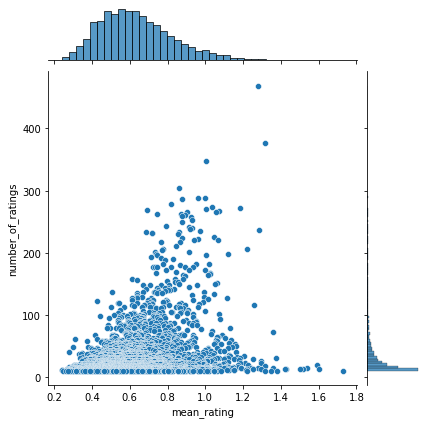

In [ ]:
sns.jointplot(x='mean_rating',y='number_of_ratings', data = agg_ratings)

In [ ]:
ratings_final = pd.merge(ratings, agg_ratings[['artist-name']], on= 'artist-name', how = 'inner')
ratings_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101827 entries, 0 to 101826
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   101827 non-null  int64  
 1   userid       101827 non-null  object 
 2   artist-name  101827 non-null  object 
 3   rating       101827 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.9+ MB


In [ ]:
ratings_final.head()

,Unnamed: 0,userid,artist-name,rating
0,0,user_001000,Wilco,5.0
1,1793,user_000997,Wilco,0.2
2,15405,user_000974,Wilco,0.2
3,18996,user_000970,Wilco,0.7
4,22509,user_000965,Wilco,2.2


In [ ]:
# Number of users
print('The ratings dataset has', ratings_final['userid'].nunique(), 'unique users')

# Number of artists
print('The ratings dataset has', ratings_final['artist-name'].nunique(), 'unique artists')

# Number of ratings
print('The ratings dataset has', ratings_final['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings_final['rating'].unique()))

The ratings dataset has 991 unique users
The ratings dataset has 2712 unique artists
The ratings dataset has 49 unique ratings
The unique ratings are [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


## Create user-item matrix

In [ ]:
matrix = ratings_final.pivot_table(index='artist-name', columns='userid', values='rating')
matrix[543:].head()

userid,user_000001,user_000002,user_000003,user_000004,user_000005,user_000006,user_000007,user_000008,user_000009,user_000010,...,user_000991,user_000992,user_000993,user_000994,user_000995,user_000996,user_000997,user_000998,user_000999,user_001000
artist-name,,,,,,,,,,,,,,,,,,,,,
Counting Crows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Covenant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cowboy Junkies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cradle Of Filth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Craig Armstrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## normalize ratingsmatrixmatrix.mean(axis=1)

In [ ]:
df = pd.DataFrame([matrix.mean(axis=1)]).T

# iterating the columns
for col in df.columns:
    print(col)

0


In [ ]:
df

,0
artist-name,
!!!,0.589831
*Nsync,0.868750
+44,0.753333
...And You Will Know Us By The Trail Of Dead,0.751471
"10,000 Maniacs",0.585714
...,...
川井憲次,0.530769
植松伸夫,0.622222
浜崎あゆみ,0.768750


In [ ]:
df.index

Index(['!!!', '*Nsync', '+44', '...And You Will Know Us By The Trail Of Dead',
       '10,000 Maniacs', '10Cc', '12 Stones', '1200 Micrograms',
       '16 Horsepower', '2 Many Dj'S',
       ...
       'Пётр Ильич Чайковский', 'Сергей Васильевич Рахманинов', '久石譲', '坂本龍一',
       '宇多田ヒカル', '川井憲次', '植松伸夫', '浜崎あゆみ', '菅野よう子', '近藤浩治'],
      dtype='object', name='artist-name', length=2712)

In [ ]:
average_per_artist = matrix.mean(axis=1).to_frame()
average_per_artist['artist-name']=list(average_per_artist.index)
average_per_artist[average_per_artist['artist-name']=='10Cc']

,0,artist-name
artist-name,,
10Cc,0.494737,10Cc


In [ ]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 0)
matrix_norm[543:].head()

userid,user_000001,user_000002,user_000003,user_000004,user_000005,user_000006,user_000007,user_000008,user_000009,user_000010,...,user_000991,user_000992,user_000993,user_000994,user_000995,user_000996,user_000997,user_000998,user_000999,user_001000
artist-name,,,,,,,,,,,,,,,,,,,,,
Counting Crows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Covenant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4625,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cowboy Junkies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cradle Of Filth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Craig Armstrong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matrix_norm.max()

userid
user_000001    4.373077
user_000002    4.283898
user_000003    4.084298
user_000004    3.722601
user_000005    3.966423
                 ...   
user_000996    3.722601
user_000997   -0.408571
user_000998    3.722601
user_000999    3.713502
user_001000    3.882677
Length: 991, dtype: float64

## Pearson similarity

In [187]:
# after normalizations the ratings is mean-centered cosine similarity
item_similarity_pearson = matrix_norm.T.corr()
item_similarity_pearson.head()

artist-name,!!!,*Nsync,+44,...And You Will Know Us By The Trail Of Dead,"10,000 Maniacs",10Cc,12 Stones,1200 Micrograms,16 Horsepower,2 Many Dj'S,...,Пётр Ильич Чайковский,Сергей Васильевич Рахманинов,久石譲,坂本龍一,宇多田ヒカル,川井憲次,植松伸夫,浜崎あゆみ,菅野よう子,近藤浩治
artist-name,,,,,,,,,,,,,,,,,,,,,
!!!,1.000000,NaN,1.0,0.018882,-0.898513,NaN,NaN,NaN,NaN,0.047672,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
*Nsync,NaN,1.000000,NaN,NaN,-0.107624,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+44,1.000000,NaN,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And You Will Know Us By The Trail Of Dead,0.018882,NaN,1.0,1.000000,0.371154,NaN,NaN,-0.628619,-0.556459,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.693375,NaN
"10,000 Maniacs",-0.898513,-0.107624,NaN,0.371154,1.000000,1.0,NaN,NaN,-1.000000,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.000000,NaN


In [ ]:
item_similarity_pearson.head()
item_similarity_pearson.head()

## Cosine similarity

In [ ]:
item_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
item_similarity_cosine

array([[ 1.        ,  0.        ,  0.03227107, ...,  0.        ,
         0.00370767,  0.        ],
       [ 0.        ,  1.        ,  0.02903801, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03227107,  0.02903801,  1.        , ...,  0.00332662,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.00332662, ...,  1.        ,
        -0.11107803,  0.        ],
       [ 0.00370767,  0.        ,  0.        , ..., -0.11107803,
         1.        ,  0.01898293],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.01898293,  1.        ]])

In [ ]:
columns = list(item_similarity_pearson.columns)
item_similarity_cosine = pd.DataFrame(item_similarity_cosine, columns = columns, index=columns)
item_similarity_cosine.head()

,!!!,*Nsync,+44,...And You Will Know Us By The Trail Of Dead,"10,000 Maniacs",10Cc,12 Stones,1200 Micrograms,16 Horsepower,2 Many Dj'S,...,Пётр Ильич Чайковский,Сергей Васильевич Рахманинов,久石譲,坂本龍一,宇多田ヒカル,川井憲次,植松伸夫,浜崎あゆみ,菅野よう子,近藤浩治
!!!,1.000000,0.000000,0.032271,0.019312,-0.029416,0.020459,0.000000,0.000000,0.025004,-0.009494,...,0.125007,0.0,0.0,0.005733,0.002387,0.0,0.0,0.000000,0.003708,0.0
*Nsync,0.000000,1.000000,0.029038,0.000000,-0.015372,0.008099,0.006839,0.014334,0.000000,-0.101641,...,0.017378,0.0,0.0,0.003759,0.000000,0.0,0.0,0.000000,0.000000,0.0
+44,0.032271,0.029038,1.000000,-0.004984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.079984,0.0,0.0,0.000000,0.000000,0.0,0.0,0.003327,0.000000,0.0
...And You Will Know Us By The Trail Of Dead,0.019312,0.000000,-0.004984,1.000000,0.016325,0.015111,0.019856,-0.031599,-0.011404,-0.006266,...,0.000000,0.0,0.0,0.010204,0.000000,0.0,0.0,0.028228,0.021622,0.0
"10,000 Maniacs",-0.029416,-0.015372,0.000000,0.016325,1.000000,-0.012582,0.000000,0.000000,0.044599,0.000000,...,0.000000,0.0,0.0,-0.057482,0.009552,0.0,0.0,0.000000,0.004370,0.0


## Jaccard

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = pairwise_distances(matrix_norm.fillna(0), metric = "hamming") # 1 - hamming = jaccard disimilarity
# optionally convert it to a DataFrame
jac_sim = pd.DataFrame(jac_sim, index=columns, columns=columns)

In [ ]:
jac_sim.head()

,!!!,*Nsync,+44,...And You Will Know Us By The Trail Of Dead,"10,000 Maniacs",10Cc,12 Stones,1200 Micrograms,16 Horsepower,2 Many Dj'S,...,Пётр Ильич Чайковский,Сергей Васильевич Рахманинов,久石譲,坂本龍一,宇多田ヒカル,川井憲次,植松伸夫,浜崎あゆみ,菅野よう子,近藤浩治
!!!,0.000000,0.075681,0.072654,0.112008,0.070636,0.077699,0.070636,0.071645,0.080727,0.073663,...,0.074672,0.075681,0.076690,0.083754,0.075681,0.072654,0.077699,0.075681,0.085772,0.070636
*Nsync,0.075681,0.000000,0.030272,0.084763,0.027245,0.033300,0.026236,0.027245,0.040363,0.036327,...,0.031282,0.032291,0.033300,0.041372,0.033300,0.029263,0.034309,0.032291,0.043391,0.027245
+44,0.072654,0.030272,0.000000,0.081736,0.029263,0.034309,0.026236,0.027245,0.039354,0.036327,...,0.030272,0.031282,0.032291,0.041372,0.032291,0.028254,0.033300,0.030272,0.042381,0.026236
...And You Will Know Us By The Trail Of Dead,0.112008,0.084763,0.081736,0.000000,0.079717,0.086781,0.078708,0.077699,0.089808,0.087790,...,0.084763,0.084763,0.085772,0.092836,0.085772,0.081736,0.086781,0.082745,0.092836,0.079717
"10,000 Maniacs",0.070636,0.027245,0.029263,0.079717,0.000000,0.031282,0.025227,0.026236,0.036327,0.035318,...,0.030272,0.030272,0.031282,0.038345,0.030272,0.027245,0.032291,0.030272,0.039354,0.025227


# Predictions

## Predict user rating for 1 artist

In [ ]:
user_id = 'user_001000'#user_000965'

picked_artist = 'Wilco'

user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})
user_id_listened_songs.head(20)

,artist-name,rating
0,Wilco,3.882677
1,Animal Collective,3.709836
2,Radiohead,3.622601
3,Girl Talk,3.535385
4,Andrew Bird,3.261616
5,Iron & Wine,3.203226
6,Aesop Rock,3.187234
7,M. Ward,2.996429
8,Sufjan Stevens,2.682323
9,Death Cab For Cutie,2.315441


In [ ]:
picked_movie_similarity_score

artist-name,artist-name,similarity_score
0,!!!,-0.044833
1,*Nsync,0.765092
2,+44,0.828494
3,...And You Will Know Us By The Trail Of Dead,0.130928
4,"10,000 Maniacs",-0.051825
...,...,...
2707,川井憲次,NaN
2708,植松伸夫,NaN
2709,浜崎あゆみ,NaN
2710,菅野よう子,0.975378


In [ ]:
picked_movie_similarity_score = item_similarity_pearson[[picked_artist]].reset_index().rename(columns={'Wilco':'similarity_score'})

n=5

user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_movie_similarity_score, on='artist-name', \
                                   how='inner').sort_values(['rating'],ascending=False)[:20].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,1.000000
1,Animal Collective,3.709836,0.158887
2,Radiohead,3.622601,0.121679
3,Girl Talk,3.535385,0.344769
4,Andrew Bird,3.261616,0.338208
5,Iron & Wine,3.203226,0.271543
6,Aesop Rock,3.187234,0.430821
7,M. Ward,2.996429,0.494883
8,Sufjan Stevens,2.682323,0.272297
9,Death Cab For Cutie,2.315441,0.173479


In [ ]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

print(predicted_rating)

2.401822


In [ ]:
user_not_listened_artist = pd.DataFrame(matrix_norm['user_000009'].isna()).reset_index()
user_not_listened_artist
user_not_listened_artist = user_not_listened_artist[user_not_listened_artist['user_000009']==True]['artist-name'].values.tolist()
user_not_listened_artist

In [ ]:
pd.DataFrame(matrix_norm['user_000009'].dropna(axis=0, how='all')\
                            .sort_values(ascending=True))\
                            .reset_index()

,artist-name,user_000009
0,:Wumpscut:,-1.008333
1,Pink Floyd,-0.858647
2,Skinny Puppy,-0.803125
3,Anberlin,-0.796667
4,宇多田ヒカル,-0.770588
5,Tiësto,-0.740351
6,My Chemical Romance,-0.705660
7,Assemblage 23,-0.675000
8,Paramore,-0.674286
9,Depeche Mode,-0.671269


## Recomend artist list

In [229]:
def artist_recomendation_item_item(userid='user_000009',number_of_similar_items=5, number_of_recommendations=3):
    import operator
    from math import isnan
    #songs that the user has not listened to.
    user_not_listened_artist = pd.DataFrame(matrix_norm[userid].isna()).reset_index()
    user_not_listened_artist = user_not_listened_artist[user_not_listened_artist[userid]==True]['artist-name'].values.tolist()
    
    
    #songs that the user has listened to.
    picked_userid_listened = pd.DataFrame(matrix_norm[userid].dropna(axis=0, how='all')\
                            .sort_values(ascending=True))\
                            .reset_index()\
                            .rename(columns={userid:'rating'})
    
    rating_prediction = {}
    
    for artist in user_not_listened_artist:
        # Calculate the similarity score of the user song compared to not listened songs
        artist_similarity_score = item_similarity_pearson[[artist]].reset_index().rename(columns={artist:'similarity_score'})
        # Rank the similarities between the user listened songs and the not listened songs.
        picked_userid_listened_similarity = pd.merge(left=picked_userid_listened, 
                                                right=artist_similarity_score, 
                                                on='artist-name', 
                                                how='inner')\
                                        .sort_values(['rating','similarity_score'], ascending=False)[:number_of_similar_items]#.fillna(0)#.dropna()
       
    # Calculate the predicted rating using weighted average of similarity scores and the ratings from the user 
        predicted_rating = round(np.average(picked_userid_listened_similarity['rating'], 
                                        weights=picked_userid_listened_similarity['similarity_score']), 6)#/sum(picked_userid_listened_similarity['similarity_score'])
       # predicted_rating = ((picked_userid_listened_similarity['rating']\
        #                    *picked_userid_listened_similarity['similarity_score']).sum())/picked_userid_listened_similarity['similarity_score'].sum()#/sum(picked_userid_listened_similarity['similarity_score'])
        
    # Save the predicted rating in the dictionary
        
        
        rating_prediction[artist] = predicted_rating
        if isnan(rating_prediction[artist]):
            rating_prediction.popitem()
        #if rating_prediction[artist]>2:
         #   print(artist)
        
    # Return the top recommended artist
    return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recommendations]

# Get recommendations
recommended_artist = artist_recomendation_item_item(userid='user_001000', number_of_similar_items=5, number_of_recommendations =10)
recommended_artist

[('Sparks', 227.585151),
 ('Rogue Wave', 107.088712),
 ('Missy Elliott', 53.054045),
 ('Danger Mouse', 32.707285),
 ('The Verve', 31.177204),
 ('Madlib', 29.333436),
 ('Sex Pistols', 17.206047),
 ('Primus', 11.969084),
 ('Au Revoir Simone', 11.805977),
 ('Bon Jovi', 11.718944)]

In [ ]:
recommended_artist[0][1]

227.585151

# persist pearson_similarity_matrix matrix

In [ ]:
matrix_norm.to_csv('./data/item_similarity_pearson.csv')
item_similarity_pearson.to_csv('./data/item_matrix_norm.csv')

# Evaluación - Experimentación Modelo Ítem ítem

# Pearson



## K = 2

In [193]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})
user_id_listened_songs                                     

,artist-name,rating
0,Wilco,3.882677
1,Animal Collective,3.709836
2,Radiohead,3.622601
3,Girl Talk,3.535385
4,Andrew Bird,3.261616
...,...,...
132,Portishead,-0.590164
133,Kanye West,-0.713103
134,Massive Attack,-0.730435
135,Tom Waits,-0.734677


In [194]:
picked_artist_similarity_score = item_similarity_pearson[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score'})
picked_artist_similarity_score

artist-name,artist-name,similarity_score
0,!!!,-0.044833
1,*Nsync,0.765092
2,+44,0.828494
3,...And You Will Know Us By The Trail Of Dead,0.130928
4,"10,000 Maniacs",-0.051825
...,...,...
2707,川井憲次,NaN
2708,植松伸夫,NaN
2709,浜崎あゆみ,NaN
2710,菅野よう子,0.975378


In [195]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:2].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,1.000000
1,Animal Collective,3.709836,0.158887


In [196]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [197]:
predicted_rating

3.85898

## K = 5

In [203]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})
user_id_listened_songs                                     

,artist-name,rating
0,Wilco,3.882677
1,Animal Collective,3.709836
2,Radiohead,3.622601
3,Girl Talk,3.535385
4,Andrew Bird,3.261616
...,...,...
132,Portishead,-0.590164
133,Kanye West,-0.713103
134,Massive Attack,-0.730435
135,Tom Waits,-0.734677


In [204]:
picked_artist_similarity_score = item_similarity_pearson[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score'})
picked_artist_similarity_score

artist-name,artist-name,similarity_score
0,!!!,-0.044833
1,*Nsync,0.765092
2,+44,0.828494
3,...And You Will Know Us By The Trail Of Dead,0.130928
4,"10,000 Maniacs",-0.051825
...,...,...
2707,川井憲次,NaN
2708,植松伸夫,NaN
2709,浜崎あゆみ,NaN
2710,菅野よう子,0.975378


In [205]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:5].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,1.000000
1,Animal Collective,3.709836,0.158887
2,Radiohead,3.622601,0.121679
3,Girl Talk,3.535385,0.344769
4,Andrew Bird,3.261616,0.338208


In [206]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [207]:
predicted_rating

3.684621

## K = 10

In [208]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})
user_id_listened_songs                                     

,artist-name,rating
0,Wilco,3.882677
1,Animal Collective,3.709836
2,Radiohead,3.622601
3,Girl Talk,3.535385
4,Andrew Bird,3.261616
...,...,...
132,Portishead,-0.590164
133,Kanye West,-0.713103
134,Massive Attack,-0.730435
135,Tom Waits,-0.734677


In [209]:
picked_artist_similarity_score = item_similarity_pearson[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score'})
picked_artist_similarity_score

artist-name,artist-name,similarity_score
0,!!!,-0.044833
1,*Nsync,0.765092
2,+44,0.828494
3,...And You Will Know Us By The Trail Of Dead,0.130928
4,"10,000 Maniacs",-0.051825
...,...,...
2707,川井憲次,NaN
2708,植松伸夫,NaN
2709,浜崎あゆみ,NaN
2710,菅野よう子,0.975378


In [210]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:10].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,1.000000
1,Animal Collective,3.709836,0.158887
2,Radiohead,3.622601,0.121679
3,Girl Talk,3.535385,0.344769
4,Andrew Bird,3.261616,0.338208
5,Iron & Wine,3.203226,0.271543
6,Aesop Rock,3.187234,0.430821
7,M. Ward,2.996429,0.494883
8,Sufjan Stevens,2.682323,0.272297
9,Death Cab For Cutie,2.315441,0.173479


In [211]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [212]:
predicted_rating

3.352997

## K = 15

In [218]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})
user_id_listened_songs                                     

,artist-name,rating
0,Wilco,3.882677
1,Animal Collective,3.709836
2,Radiohead,3.622601
3,Girl Talk,3.535385
4,Andrew Bird,3.261616
...,...,...
132,Portishead,-0.590164
133,Kanye West,-0.713103
134,Massive Attack,-0.730435
135,Tom Waits,-0.734677


In [219]:
picked_artist_similarity_score = item_similarity_pearson[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score'})
picked_artist_similarity_score

artist-name,artist-name,similarity_score
0,!!!,-0.044833
1,*Nsync,0.765092
2,+44,0.828494
3,...And You Will Know Us By The Trail Of Dead,0.130928
4,"10,000 Maniacs",-0.051825
...,...,...
2707,川井憲次,NaN
2708,植松伸夫,NaN
2709,浜崎あゆみ,NaN
2710,菅野よう子,0.975378


In [220]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:15].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,1.000000
1,Animal Collective,3.709836,0.158887
2,Radiohead,3.622601,0.121679
3,Girl Talk,3.535385,0.344769
4,Andrew Bird,3.261616,0.338208
5,Iron & Wine,3.203226,0.271543
6,Aesop Rock,3.187234,0.430821
7,M. Ward,2.996429,0.494883
8,Sufjan Stevens,2.682323,0.272297
9,Death Cab For Cutie,2.315441,0.173479


In [221]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [222]:
predicted_rating

2.879201

In [222]:
2.879201

## K = 20

In [223]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})
user_id_listened_songs                                     

,artist-name,rating
0,Wilco,3.882677
1,Animal Collective,3.709836
2,Radiohead,3.622601
3,Girl Talk,3.535385
4,Andrew Bird,3.261616
...,...,...
132,Portishead,-0.590164
133,Kanye West,-0.713103
134,Massive Attack,-0.730435
135,Tom Waits,-0.734677


In [224]:
picked_artist_similarity_score = item_similarity_pearson[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score'})
picked_artist_similarity_score

artist-name,artist-name,similarity_score
0,!!!,-0.044833
1,*Nsync,0.765092
2,+44,0.828494
3,...And You Will Know Us By The Trail Of Dead,0.130928
4,"10,000 Maniacs",-0.051825
...,...,...
2707,川井憲次,NaN
2708,植松伸夫,NaN
2709,浜崎あゆみ,NaN
2710,菅野よう子,0.975378


In [225]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:20].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,1.000000
1,Animal Collective,3.709836,0.158887
2,Radiohead,3.622601,0.121679
3,Girl Talk,3.535385,0.344769
4,Andrew Bird,3.261616,0.338208
5,Iron & Wine,3.203226,0.271543
6,Aesop Rock,3.187234,0.430821
7,M. Ward,2.996429,0.494883
8,Sufjan Stevens,2.682323,0.272297
9,Death Cab For Cutie,2.315441,0.173479


In [226]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [227]:
predicted_rating

2.401822

# Coseno

## K = 2

In [230]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})

In [231]:
picked_artist_similarity_score = item_similarity_cosine[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score', 'index':'artist-name'})
picked_artist_similarity_score


,artist-name,similarity_score
0,!!!,-0.005901
1,*Nsync,0.021257
2,+44,0.008118
3,...And You Will Know Us By The Trail Of Dead,0.039683
4,"10,000 Maniacs",-0.017285
...,...,...
2707,川井憲次,0.003098
2708,植松伸夫,0.026740
2709,浜崎あゆみ,0.000000
2710,菅野よう子,0.035400


In [232]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:2].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,1.000000
1,Animal Collective,3.709836,0.074527


In [233]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [234]:
predicted_rating

3.870689

## K = 5

In [235]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})

In [236]:
picked_artist_similarity_score = item_similarity_cosine[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score', 'index':'artist-name'})
picked_artist_similarity_score


,artist-name,similarity_score
0,!!!,-0.005901
1,*Nsync,0.021257
2,+44,0.008118
3,...And You Will Know Us By The Trail Of Dead,0.039683
4,"10,000 Maniacs",-0.017285
...,...,...
2707,川井憲次,0.003098
2708,植松伸夫,0.026740
2709,浜崎あゆみ,0.000000
2710,菅野よう子,0.035400


In [237]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:5].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,1.000000
1,Animal Collective,3.709836,0.074527
2,Radiohead,3.622601,0.065143
3,Girl Talk,3.535385,0.070345
4,Andrew Bird,3.261616,0.127763


In [238]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [239]:
predicted_rating

3.782808

## K = 10

In [240]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})

In [241]:
picked_artist_similarity_score = item_similarity_cosine[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score', 'index':'artist-name'})
picked_artist_similarity_score


,artist-name,similarity_score
0,!!!,-0.005901
1,*Nsync,0.021257
2,+44,0.008118
3,...And You Will Know Us By The Trail Of Dead,0.039683
4,"10,000 Maniacs",-0.017285
...,...,...
2707,川井憲次,0.003098
2708,植松伸夫,0.026740
2709,浜崎あゆみ,0.000000
2710,菅野よう子,0.035400


In [242]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:10].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,1.000000
1,Animal Collective,3.709836,0.074527
2,Radiohead,3.622601,0.065143
3,Girl Talk,3.535385,0.070345
4,Andrew Bird,3.261616,0.127763
5,Iron & Wine,3.203226,0.145894
6,Aesop Rock,3.187234,0.083681
7,M. Ward,2.996429,0.300279
8,Sufjan Stevens,2.682323,0.158744
9,Death Cab For Cutie,2.315441,0.088025


In [243]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [244]:
predicted_rating

3.463858

## K = 15

In [245]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})

In [246]:
picked_artist_similarity_score = item_similarity_cosine[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score', 'index':'artist-name'})
picked_artist_similarity_score


,artist-name,similarity_score
0,!!!,-0.005901
1,*Nsync,0.021257
2,+44,0.008118
3,...And You Will Know Us By The Trail Of Dead,0.039683
4,"10,000 Maniacs",-0.017285
...,...,...
2707,川井憲次,0.003098
2708,植松伸夫,0.026740
2709,浜崎あゆみ,0.000000
2710,菅野よう子,0.035400


In [247]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:15].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,1.000000
1,Animal Collective,3.709836,0.074527
2,Radiohead,3.622601,0.065143
3,Girl Talk,3.535385,0.070345
4,Andrew Bird,3.261616,0.127763
5,Iron & Wine,3.203226,0.145894
6,Aesop Rock,3.187234,0.083681
7,M. Ward,2.996429,0.300279
8,Sufjan Stevens,2.682323,0.158744
9,Death Cab For Cutie,2.315441,0.088025


In [248]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [249]:
predicted_rating

3.119255

## K = 20

In [250]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})

In [251]:
picked_artist_similarity_score = item_similarity_cosine[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score', 'index':'artist-name'})
picked_artist_similarity_score


,artist-name,similarity_score
0,!!!,-0.005901
1,*Nsync,0.021257
2,+44,0.008118
3,...And You Will Know Us By The Trail Of Dead,0.039683
4,"10,000 Maniacs",-0.017285
...,...,...
2707,川井憲次,0.003098
2708,植松伸夫,0.026740
2709,浜崎あゆみ,0.000000
2710,菅野よう子,0.035400


In [252]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:20].dropna()
user_listened_similarity

,artist-name,rating,similarity_score
0,Wilco,3.882677,1.000000
1,Animal Collective,3.709836,0.074527
2,Radiohead,3.622601,0.065143
3,Girl Talk,3.535385,0.070345
4,Andrew Bird,3.261616,0.127763
5,Iron & Wine,3.203226,0.145894
6,Aesop Rock,3.187234,0.083681
7,M. Ward,2.996429,0.300279
8,Sufjan Stevens,2.682323,0.158744
9,Death Cab For Cutie,2.315441,0.088025


In [253]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [254]:
predicted_rating

2.748079

# Jaccard

## K = 2

In [258]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})

In [259]:
picked_artist_similarity_score = jac_sim[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score', 'index':'artist-name'})
picked_artist_similarity_score


,artist-name,similarity_score
0,!!!,0.164480
1,*Nsync,0.140262
2,+44,0.140262
3,...And You Will Know Us By The Trail Of Dead,0.171544
4,"10,000 Maniacs",0.134208
...,...,...
2707,川井憲次,0.140262
2708,植松伸夫,0.145308
2709,浜崎あゆみ,0.144299
2710,菅野よう子,0.150353


In [260]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:2].dropna()

In [261]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [262]:
predicted_rating

3.709836

## K = 5

In [263]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})

In [264]:
picked_artist_similarity_score = jac_sim[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score', 'index':'artist-name'})
picked_artist_similarity_score


,artist-name,similarity_score
0,!!!,0.164480
1,*Nsync,0.140262
2,+44,0.140262
3,...And You Will Know Us By The Trail Of Dead,0.171544
4,"10,000 Maniacs",0.134208
...,...,...
2707,川井憲次,0.140262
2708,植松伸夫,0.145308
2709,浜崎あゆみ,0.144299
2710,菅野よう子,0.150353


In [265]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:5].dropna()

In [266]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [267]:
predicted_rating

3.563455

## K = 10

In [268]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})

In [269]:
picked_artist_similarity_score = jac_sim[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score', 'index':'artist-name'})
picked_artist_similarity_score


,artist-name,similarity_score
0,!!!,0.164480
1,*Nsync,0.140262
2,+44,0.140262
3,...And You Will Know Us By The Trail Of Dead,0.171544
4,"10,000 Maniacs",0.134208
...,...,...
2707,川井憲次,0.140262
2708,植松伸夫,0.145308
2709,浜崎あゆみ,0.144299
2710,菅野よう子,0.150353


In [270]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:10].dropna()

In [271]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [272]:
predicted_rating

3.167295

## K = 15

In [273]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})

In [274]:
picked_artist_similarity_score = jac_sim[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score', 'index':'artist-name'})
picked_artist_similarity_score


,artist-name,similarity_score
0,!!!,0.164480
1,*Nsync,0.140262
2,+44,0.140262
3,...And You Will Know Us By The Trail Of Dead,0.171544
4,"10,000 Maniacs",0.134208
...,...,...
2707,川井憲次,0.140262
2708,植松伸夫,0.145308
2709,浜崎あゆみ,0.144299
2710,菅野よう子,0.150353


In [275]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:15].dropna()

In [276]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [277]:
predicted_rating

2.731328

## K = 20

In [278]:
user_id = 'user_001000'
picked_artist = 'Wilco'
user_id_listened_songs = pd.DataFrame(matrix_norm[user_id].dropna(axis=0,how='all')\
                                     .sort_values(ascending=False)).reset_index().rename(columns={user_id:'rating'})

In [279]:
picked_artist_similarity_score = jac_sim[[picked_artist]].reset_index().rename(columns={picked_artist:'similarity_score', 'index':'artist-name'})
picked_artist_similarity_score


,artist-name,similarity_score
0,!!!,0.164480
1,*Nsync,0.140262
2,+44,0.140262
3,...And You Will Know Us By The Trail Of Dead,0.171544
4,"10,000 Maniacs",0.134208
...,...,...
2707,川井憲次,0.140262
2708,植松伸夫,0.145308
2709,浜崎あゆみ,0.144299
2710,菅野よう子,0.150353


In [280]:
user_listened_similarity = pd.merge(left=user_id_listened_songs, right=picked_artist_similarity_score, on='artist-name', how='inner').sort_values(['rating'],ascending=False)[:20].dropna()

In [281]:
predicted_rating = round(np.average(user_listened_similarity['rating'], weights=user_listened_similarity['similarity_score']),6)

In [282]:
predicted_rating

2.316163

# 25

In [149]:
matrix_norm[user_id][picked_artist]

3.8826771653543304

# Prediction List

In [256]:
def artist_recomendation_item_item_jaccard(userid,number_of_similar_items, number_of_recommendations):
    import operator
    from math import isnan
    #songs that the user has not listened to.
    user_not_listened_artist = pd.DataFrame(matrix_norm[userid].isna()).reset_index()
    user_not_listened_artist = user_not_listened_artist[user_not_listened_artist[userid]==True]['artist-name'].values.tolist()
    
    
    #songs that the user has listened to.
    picked_userid_listened = pd.DataFrame(matrix_norm[userid].dropna(axis=0, how='all')\
                            .sort_values(ascending=True))\
                            .reset_index()\
                            .rename(columns={userid:'rating'})
    
    rating_prediction = {}
    
    for artist in user_not_listened_artist:
        # Calculate the similarity score of the user song compared to not listened songs
        artist_similarity_score = jac_sim[[artist]].reset_index().rename(columns={artist:'similarity_score', 'index':'artist-name'})
        # Rank the similarities between the user listened songs and the not listened songs.
        picked_userid_listened_similarity = pd.merge(left=picked_userid_listened, 
                                                right=artist_similarity_score, 
                                                on='artist-name', 
                                                how='inner')\
                                        .sort_values(['rating','similarity_score'], ascending=False)[:number_of_similar_items]#.fillna(0).dropna()
       
    # Calculate the predicted rating using weighted average of similarity scores and the ratings from the user 
        predicted_rating = round(np.average(picked_userid_listened_similarity['rating'], weights=picked_userid_listened_similarity['similarity_score']), 6)#/sum(picked_userid_listened_similarity['similarity_score'])
       # predicted_rating = ((picked_userid_listened_similarity['rating']\
        #                    *picked_userid_listened_similarity['similarity_score']).sum())/picked_userid_listened_similarity['similarity_score'].sum()#/sum(picked_userid_listened_similarity['similarity_score'])
        
    # Save the predicted rating in the dictionary
        
        
        rating_prediction[artist] = predicted_rating
        if isnan(rating_prediction[artist]):
            rating_prediction.popitem()
        #if rating_prediction[artist]>2:
         #   print(artist)
        
    # Return the top recommended artist
    return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recommendations]

# Get recommendations


In [257]:
recommended_artist = artist_recomendation_item_item_jaccard('user_001000', 5, 10)
recommended_artist

[('The Brunettes', 3.625432),
 ('Hammock', 3.625418),
 ('The Twilight Sad', 3.625285),
 ('Ra Ra Riot', 3.625197),
 ('Sean Lennon', 3.625143),
 ('The Adicts', 3.62511),
 ('The Tiger Lillies', 3.625096),
 ('Mugison', 3.62509),
 ('B. Fleischmann', 3.625055),
 ('Dr. Dog', 3.625004)]

In [181]:
def artist_recomendation_item_item_pearson(userid,number_of_similar_items, number_of_recommendations):
    import operator
    from math import isnan
    #songs that the user has not listened to.
    user_not_listened_artist = pd.DataFrame(matrix_norm[userid].isna()).reset_index()
    user_not_listened_artist = user_not_listened_artist[user_not_listened_artist[userid]==True]['artist-name'].values.tolist()
    
    
    #songs that the user has listened to.
    picked_userid_listened = pd.DataFrame(matrix_norm[userid].dropna(axis=0, how='all')\
                            .sort_values(ascending=True))\
                            .reset_index()\
                            .rename(columns={userid:'rating'})
    
    rating_prediction = {}
    
    for artist in user_not_listened_artist:
        # Calculate the similarity score of the user song compared to not listened songs
        artist_similarity_score = item_similarity_pearson[[artist]].reset_index().rename(columns={artist:'similarity_score', 'index':'artist-name'})
        # Rank the similarities between the user listened songs and the not listened songs.
        picked_userid_listened_similarity = pd.merge(left=picked_userid_listened, 
                                                right=artist_similarity_score, 
                                                on='artist-name', 
                                                how='inner')\
                                        .sort_values(['rating','similarity_score'], ascending=False)[:number_of_similar_items]#.fillna(0).dropna()
       
    # Calculate the predicted rating using weighted average of similarity scores and the ratings from the user 
        predicted_rating = round(np.average(picked_userid_listened_similarity['rating'], weights=picked_userid_listened_similarity['similarity_score']), 6)
        print(predicted_rating)#/sum(picked_userid_listened_similarity['similarity_score'])
       # predicted_rating = ((picked_userid_listened_similarity['rating']\
        #                    *picked_userid_listened_similarity['similarity_score']).sum())/picked_userid_listened_similarity['similarity_score'].sum()#/sum(picked_userid_listened_similarity['similarity_score'])
        
    # Save the predicted rating in the dictionary
        
        
        rating_prediction[artist] = predicted_rating
        if isnan(rating_prediction[artist]):
            rating_prediction.popitem()
        #if rating_prediction[artist]>2:
         #   print(artist)
        
    # Return the top recommended artist
    return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recommendations]

# Get recommendations

In [182]:
recommended_artist = artist_recomendation_item_item_pearson('user_000001', 5, 10)
recommended_artist

4.103209
nan
nan
nan
nan
2.91716
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4.761796
nan
nan
nan
nan
nan
nan
nan
nan
3.287717
3.322975
nan
nan
nan
1.239175
nan
nan
4.00195
nan
nan
nan
nan
5.04344
nan
nan
nan
nan
nan
nan
nan
nan
nan
2.731651
nan
nan
12.27543
nan
nan
-11.304634
nan
nan
nan
nan
nan
nan
7.709524
-32.155405
nan
nan
nan
nan
3.317408
nan
nan
nan
nan
-5.383604
nan
nan
nan
nan
nan
nan
4.724574
3.684102
nan
6.618328
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
2.96832
nan
2.108851
nan
nan
nan
nan
nan
nan
3.906858
nan
nan
nan
-1.354707
nan
nan
nan
nan
2.446441
nan
nan
nan
nan
nan
4.234361
nan
nan
nan
2.394701
nan
nan
nan
nan
-2.211369
8.058571
3.473753
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
0.679443
nan
3.728
nan
nan
1.383472
3.038822
nan
nan
nan
nan
nan
5.602878
nan
nan
4.006661
1.883794
-3.036577
nan
3.528726
nan
nan
nan
nan
nan
nan
nan
nan
2.481882
nan
nan
nan
nan
nan
nan
nan
nan
nan
5.060178
nan
nan
nan
3.696342
nan
nan
nan
nan
5.178626
nan
nan
nan
nan
-141.1

[('This Mortal Coil', 946.222611),
 ('Ramones', 121.702954),
 ('Prince', 101.24531),
 ('Bill Evans', 95.009174),
 ('The Orb', 67.557562),
 ('The New Pornographers', 59.360076),
 ('Bright Eyes', 56.292136),
 ('Sia', 46.297456),
 ('Daedelus', 31.3165),
 ('The Clash', 27.022349)]